# Part I - (Loan Data from Prosper)
## by (Gladys Mwangi)

##### Project 3 : Exploration
## Introduction

 > This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> This data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)  explains the variables in the data set.

## Preliminary Wrangling
Project Steps Overview
* <a href='#01'> Step 1:</a>  Gathering & Assessing Data
* <a href='#02'>Step 2:</a> Univariate Data Exploration  
* <a href='#03'>Step 3: </a> Bivariate Data Exploration
* <a href='#04'>Step 4: </a> Multivariate Data Exploration
* <a href='#05'>Step 5:  </a> Conclusions 





>What are the desired outputs of the project?

Your goal: This part of the project is an opportunity to ask questions about the data and make discoveries about loan data from prosper

> What are the questions trying to answer?
1. What factors affect a loan’s outcome status?
2. What affects the borrower’s APR or interest rate?
3. Are there differences between loans depending on how large the original loan amount was?

In [103]:
#conda install -c conda-forge wordcloud


In [104]:
#conda install -c https://conda.anaconda.org/conda-forge wordcloud

In [137]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import seaborn as sb
import re
%matplotlib inline

<a id='01'></a>
### Loading data

* This step is loading the dataset as loan 

In [106]:
#loading the data
loan = pd.read_csv('prosperLoanData.csv')


### Assessing
* visually assessing the data

In [107]:
#overview of the data 
print(loan.shape)
print(loan.dtypes)
print(loan.head(5))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0      

> the data set has many columns that can be explored but for this project i will selecting the following columns for exploration

In [108]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'IncomeRange','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Occupation']
df_loan= loan[cols]

In [109]:
# display information about the subdataset
df_loan.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
count,113937.00000,113912.000000,113937.000000,1.139370e+05,113937.000000
mean,8337.01385,0.218828,0.192764,5.608026e+03,40.830248
std,6245.80058,0.080364,0.074818,7.478497e+03,10.436212
min,1000.00000,0.006530,0.000000,0.000000e+00,12.000000
25%,4000.00000,0.156290,0.134000,3.200333e+03,36.000000
50%,6500.00000,0.209760,0.184000,4.666667e+03,36.000000
75%,12000.00000,0.283810,0.250000,6.825000e+03,36.000000
max,35000.00000,0.512290,0.497500,1.750003e+06,60.000000


In [110]:
df_loan.info()
df_loan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   BorrowerRate           113937 non-null  float64
 3   IncomeRange            113937 non-null  object 
 4   StatedMonthlyIncome    113937 non-null  float64
 5   Term                   113937 non-null  int64  
 6   ProsperRating (Alpha)  84853 non-null   object 
 7   EmploymentStatus       111682 non-null  object 
 8   Occupation             110349 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.8+ MB


(113937, 9)

In [111]:
df_loan.sample(5)

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,IncomeRange,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,Occupation
101187,1000,0.30962,0.2900,Not displayed,1625.000000,36,NaN,Not available,Other
92427,15000,0.28704,0.2610,"$25,000-49,999",2477.750000,60,D,Other,Other
81985,25000,0.16717,0.1600,Not displayed,0.083333,36,NaN,Not available,Other
29718,8500,0.21290,0.1760,"$25,000-49,999",3333.333333,36,C,Self-employed,Landscaping
76974,4000,0.20524,0.1685,"$50,000-74,999",4416.666667,36,C,Employed,Accountant/CPA


In [112]:
# drop duplicates in the dataset
df_loan = df_loan.drop_duplicates()

In [113]:
# Remove loans with missing borrower APR information
df_loan = df_loan[~df_loan.BorrowerAPR.isna()]

### What is the structure of your dataset?
> This dataset has 113610 entries belonging to 81 variables. The subset of data frame has 113610 entries and  8 columns.The dtypes include : category(2), float64(3), int64(2), object(1)
* Categorical Variables BorrowerState, Occupation, EmployementStatus, IncomeRange, CreditGrade, LoanStatus and ListingCategory are the categorical variables analysed here.
* Numerical Variables Term, BorrowerAPR, BorrowerRate, LenderYield, LoanOriginalAmount, ListingCreationDate , StatedMonthlyIncome, DebtToIncomeRatio and ProsperScore are the main numerical variables analysed here.


### What is/are the main feature(s) of interest in your dataset?

> the BorrowerAPR,	BorrowerRate and the loanoriginal amount 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>The features that will help in my investigation are the subset data frame df_loan, which are the LoanOriginalAmount,	BorrowerAPR	BorrowerRate,	StatedMonthlyIncome	Term,	ProsperRating (Alpha),	EmploymentStatus,	Occupation

In [114]:
#df_loans = df_loan.copy()

<a id='02'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. looking for unusual points or outliers, take a deeper look to clean things up and the relationships between variables.





### Numerical Variables 

array([[<AxesSubplot:title={'center':'LoanOriginalAmount'}>,
        <AxesSubplot:title={'center':'BorrowerAPR'}>],
       [<AxesSubplot:title={'center':'BorrowerRate'}>,
        <AxesSubplot:title={'center':'StatedMonthlyIncome'}>],
       [<AxesSubplot:title={'center':'Term'}>, <AxesSubplot:>]],
      dtype=object)

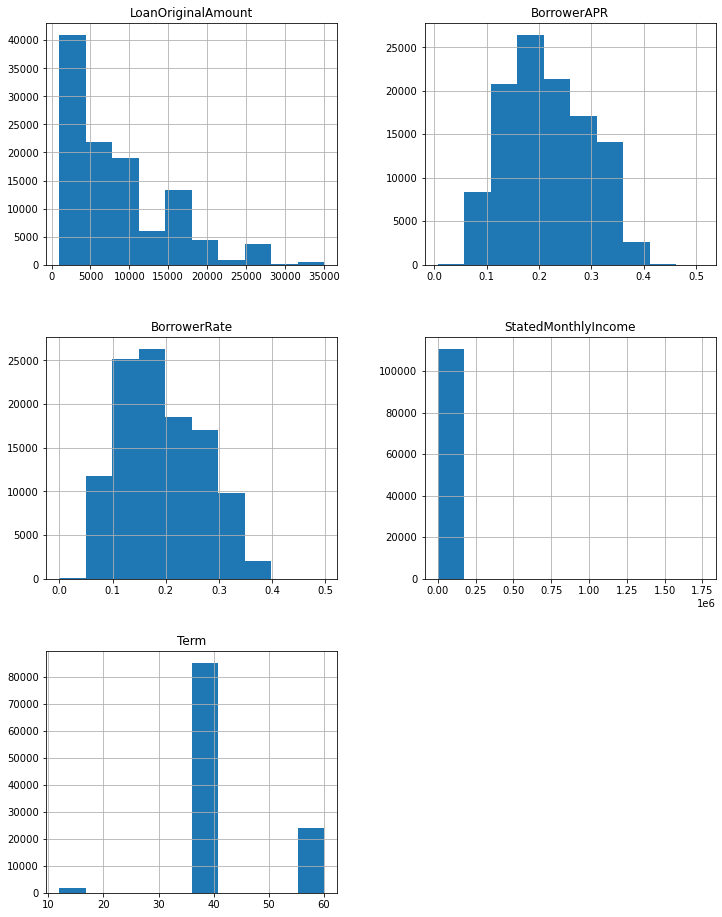

In [115]:
# a general distribution of numerival variable 
df_loan.hist(figsize = [12, 16])

### Stated Monthly Income
> this the monthly income the borrower stated at the time the listing was created.

Text(0.5, 1.0, 'Stated Monthly Income amount distribution')

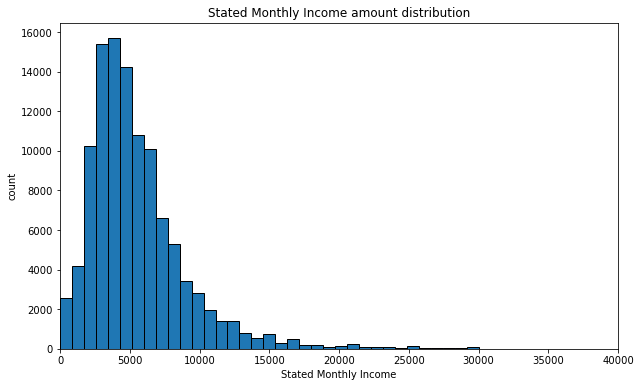

In [190]:
#ploting the montly income
plt.figure(figsize = (10,6))
plt.hist(df_loan.StatedMonthlyIncome,35,edgecolor='black');
plt.xlim(0,40000);
plt.xlabel('Stated Monthly Income')
plt.ylabel('count')
plt.title('Stated Monthly Income amount distribution')


In [121]:
df_loan.StatedMonthlyIncome.describe()

count    110486.000000
mean       5477.251597
std        3516.757217
min           0.000000
25%        3208.333333
50%        4666.666667
75%        6833.333333
max       30000.000000
Name: StatedMonthlyIncome, dtype: float64

>Observation:  From above we can observe that the average stated income is ranges from 3k to 5k very few count of amount ranging over 10k

<a id='B'></a>
### BrowerAPR and BorrowerRate
> The BorrowerRate (interest rate) refers to the Borrower's interest rate for this loan. The BorrowerAPR is the Borrower's Annual Percentage Rate (APR) for the loan.

/tmp/ipykernel_30774/1880010556.py:21: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


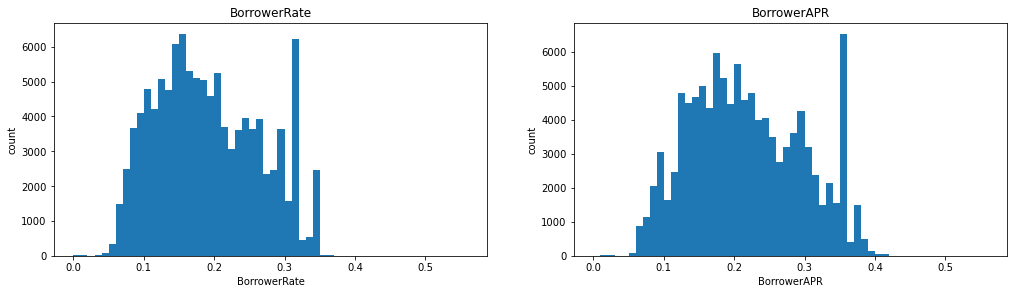

In [122]:
 #figsize() function to adjust the size
# og function
plt.subplots(figsize=(15, 5))
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01) 
# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
plt.hist(data = df_loan, x = 'BorrowerRate', bins = bins);
plt.title('BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('count')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.title('BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
 
# space between the plots
plt.tight_layout(4)
 
# show plot
plt.show()

* Observation: The Borrower rate has a similar distribution as Borrower APR with a slight difference


In [123]:
# Check loans with APR greater than 0.43
df_loan[df_loan.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,IncomeRange,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,Occupation
18326,3000,0.45857,0.4500,Not displayed,10000.000000,36,NaN,NaN,NaN
22195,1789,0.46201,0.4500,Not displayed,2916.666667,36,NaN,NaN,NaN
36018,1500,0.51229,0.4975,Not displayed,2838.000000,36,NaN,NaN,NaN
56761,3000,0.50633,0.4975,Not displayed,0.000000,36,NaN,NaN,NaN
82043,3000,0.48873,0.4800,Not displayed,1583.333333,36,NaN,NaN,NaN
103973,2800,0.45857,0.4500,Not displayed,3750.000000,36,NaN,NaN,NaN


> Observation: From the above you can observe that the The 7 borrowers with largest APR have small loan amount and don't have records of Prosper rating and employment status and Occupation

<a id='LO'></a>
### Loan original amount

/home/analyst/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Orginal loan amount distribution')

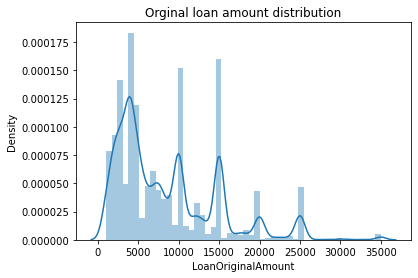

In [189]:
#ploting the loanoriginalanount
sb.distplot(df_loan['LoanOriginalAmount']);
plt.title('Orginal loan amount distribution')

> The distrbution plot show that roughly between 3000 - 5000 loan amount has the highest count, below is a better illustration

Text(0.5, 1.0, 'Orginal loan aount distribution')

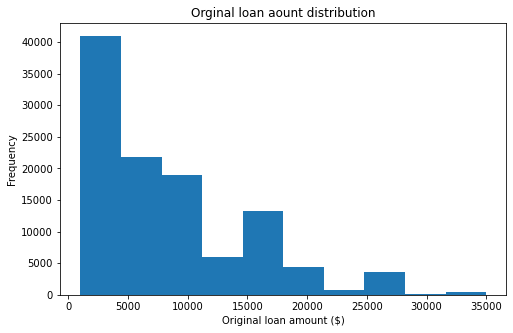

In [125]:
#ploting the loan original amount
plt.figure(figsize=[8, 5])
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Frequency');
plt.title('Orginal loan amount distribution')



* Observation: From the above we can observe there  is a very large spike in frequency from amounts less thab 5k, then the frequency decreases from amount ranging from 20k to 35k 


### Categorical Variables 
* The next step is looking for Look at distributions of Occupation, Prosper rating and employment status

1. Ocuppation  - The field of emplyement.
2. Prosper rating - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
3. Employment status - The employment status of the borrower at the time they posted the listing.
4. Term - duration of the loan 
5. Occupation - Borrower's occupation

In [126]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_var)


<a id='PR'></a>
### Prosper Rating

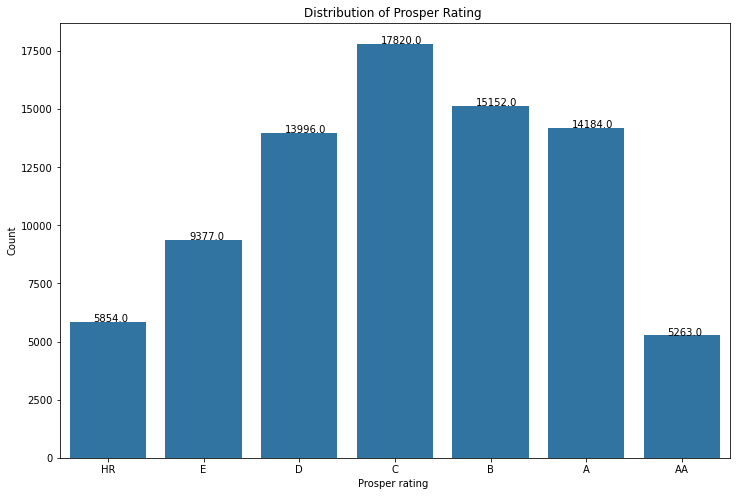

In [127]:
#ploting the  distribution
plt.figure(figsize=(12,8))
default_color = sb.color_palette()[0]
ax = sb.countplot(x="ProsperRating (Alpha)", data=df_loan ,  color = default_color)
plt.title('Distribution of Prosper Rating ')
plt.xlabel('Prosper rating ')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Observation: The prosper rating  C has a count of high count 17820

<a id='ES'></a>
### Employement Status 

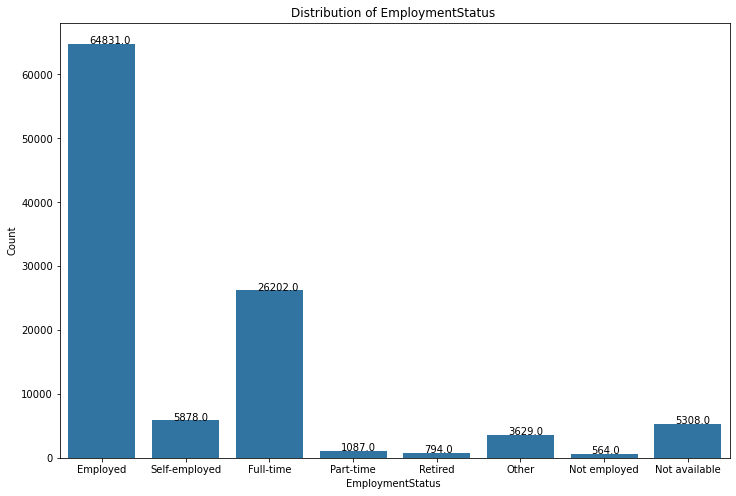

In [128]:
#plottling the distribution 
plt.figure(figsize=(12,8))

ax = sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color);
plt.title('Distribution of EmploymentStatus ')
plt.xlabel('EmploymentStatus ')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))



Prevoisly we had seen there are NAN values in the column occupation we will remove them 

<a id='O'></a>
### Occupation

In [138]:
  #set up stop words  it will skip all null values
    
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ['nan', 'NaN', 'Nan', 'NAN'] + list(STOPWORDS)
    

In [139]:
   #iterate through the df         
values = df_loan['Occupation'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '
    

In [140]:
#generate word cloud
facecolor = 'black'

wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopwords,
            min_font_size=10).generate(comment_words)
    

Occupation word cloud 


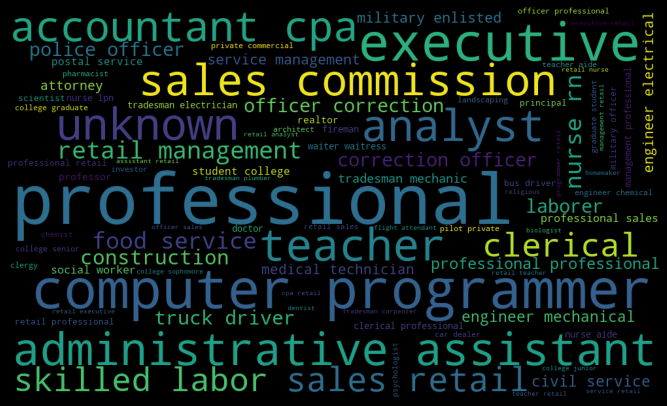

In [191]:
#plot the word cloud
            
plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)
print ('Occupation word cloud ')

In [142]:
#save the image
filename = 'wordcloud Occuppation'
plt.savefig(filename+'.png', facecolor=facecolor)

<Figure size 432x288 with 0 Axes>

Observation : a simple illustration of the occupations that the clients listed 

### Terms Distribution
this is the loan duration in month 

In [143]:
#labeling the terms 
data = df_loan.Term.value_counts().values
labels = ["36months", "60months", "12months"]

colors = sb.color_palette("pastel")[0:3]

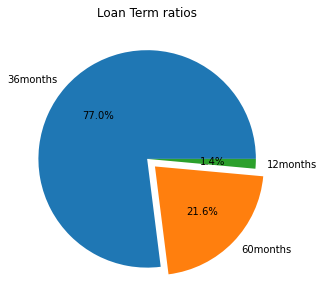

In [144]:
#plotting term distribution
plt.figure(figsize = [10, 5])
explode = (0, 0.1, 0) 
plt.pie(data,explode= explode,  labels = labels, autopct='%1.1f%%')
plt.title("Loan Term ratios");

* Observation: The length of most of the loans are 36 months. 

<a id='IR'></a>
### Income Range
The income range of the borrower at the time the listing was created.

In [145]:
df_loan.IncomeRange.value_counts()

$25,000-49,999    31153
$50,000-74,999    30120
$100,000+         16734
$75,000-99,999    16537
Not displayed      7639
$1-24,999          7155
$0                  613
Not employed        535
Name: IncomeRange, dtype: int64

observation: There are 2 categories - ‘Not employed’ and ‘$0’ , these both are basically unemployed people so I'll be replacing ‘Not employed’

In [146]:
df_loan.IncomeRange = df_loan.IncomeRange.str.replace('Not employed','$0')

In [147]:
#testing the code
df_loan.IncomeRange.value_counts()


$25,000-49,999    31153
$50,000-74,999    30120
$100,000+         16734
$75,000-99,999    16537
Not displayed      7639
$1-24,999          7155
$0                 1148
Name: IncomeRange, dtype: int64

* Observation: The unemployeed have been compined with income ranging 0

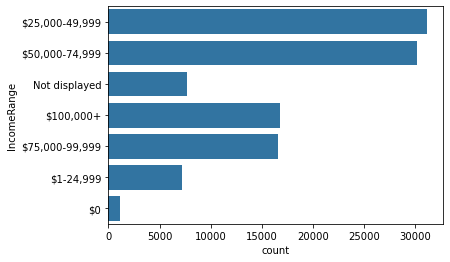

In [148]:
#count plot on single categorical variable
sb.countplot(y ='IncomeRange', data = df_loan, color = sb.color_palette()[0])
 
# Show the plot
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. 

> The distribution of borrowers APR and borrowers rate looks multimodal. Most of the values are at the range of 0.05 and 0.4. 
### Were there any unusual points?  Did you need to perform any transformations?
> There are no unusual points and no need to perform any transformations.


### Of the features you investigated, were there any unusual distributions? 
> The distribution of borrowers APR and borrowers rate looks multimodal. Most of the values are at the range of 0.05 and 0.4.The length of most of the loans are 36 months. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.

### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> In Stated Monthly income in percentage the is less than 0.3 % of people who have an income of 30k per month this can seem as a outlier , the solution is to remove the outlier, 
Remove loans with missing borrower APR information
Convert ProsperRating and Employment status into ordered categorical types


<a id='03'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the data. Comparing two variable with each other in the attempt of finding solutions to this questions. 
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?


####  How does <a href='#IR'> Income Range</a>  affects loan original amount 
click the link to view the originl distribution of income range 

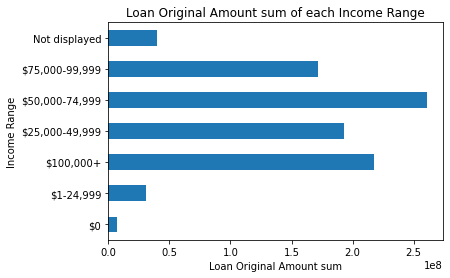

In [149]:
#using the group by function to group according to income range
df_loan.groupby('IncomeRange').LoanOriginalAmount.sum().plot(kind='barh',color = sb.color_palette()[0]);
plt.xlabel("Loan Original Amount sum");
plt.ylabel("Income Range");
plt.title("Loan Original Amount sum of each Income Range");

Observations: Employeed people are more likely to have a higher loan count of 70,000 thousand and while not available , not employeed , partime have a low loan count of les s than 10,000

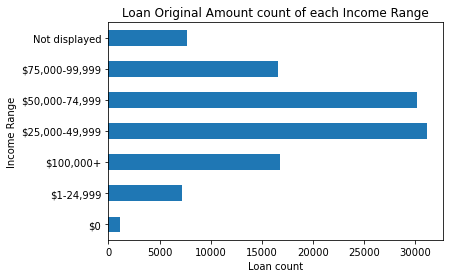

In [186]:
df_loan.groupby('IncomeRange').LoanOriginalAmount.size().plot(kind='barh',color = sb.color_palette()[0]);
plt.xlabel("Loan count");
plt.ylabel("Income Range");
plt.title("Loan Original Amount count of each Income Range");

Observation: People with an income that range between 25,000 to 100,000 have a higher loan count,unlike income ranges of  ranges of less than 25,000, for the ranges of 0 the are no loans given

#### how does <a href='#LO'> Loan Original Amount </a> vary with different <a href='#ES'> Employment status</a> 

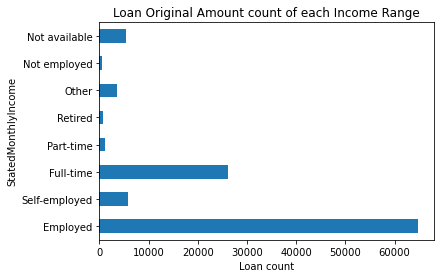

In [152]:
df_loan.groupby('EmploymentStatus').LoanOriginalAmount.size().plot(kind='barh',color = sb.color_palette()[0]);
plt.xlabel("Loan count");
plt.ylabel("StatedMonthlyIncome");
plt.title("Loan Original Amount count of each Income Range");

Observation : The employeed persons have a higher loan count as compared to the un employeed,The bank will less likely give out loans to people with no sources of income. 

#### how does <a href='#LO'> Loan Original Amount </a>variation with <a href='#PR'> Prosper Rating</a>

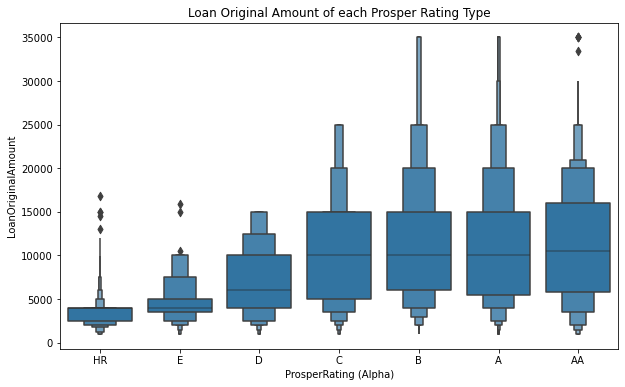

In [161]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,6))
sb.boxenplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);
plt.title("Loan Original Amount of each Prosper Rating Type");

Observtaion: we can observe from the graph that the groups of higher risk (HR) took lower loan amount and the groups C, B and A looks like have the same median loan amounts. The lowest risk group AA shows highest median loan amount.
The result is as expected as people with lower risk have the tendency to take more amount and vice versa.

 #### how does  <a href='#B'> Borrower APR </a> vary by <a href='#PR'> Prosper Rating</a>

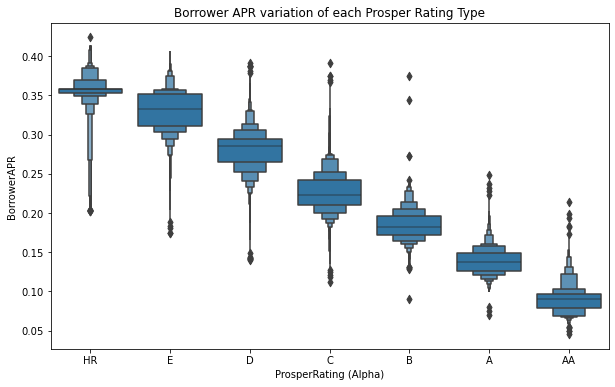

In [196]:
plt.figure(figsize=(10,6))
sb.boxenplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', color = base_color,order =["HR", "E", "D", "C", "B","A", "AA"]);
plt.title("Borrower APR variation of each Prosper Rating Type");

Observation: BorrowerAPR is the Borrower's Annual Percentage Rate (APR) for the loan. As we get into low risk range (From HR to AA ) the APR reduce drastically. Also number of outliers also decreases down the line.

#### How does <a href='#IR'> Income Range</a>affect  <a href='#B'> Borrowers Rate </a>

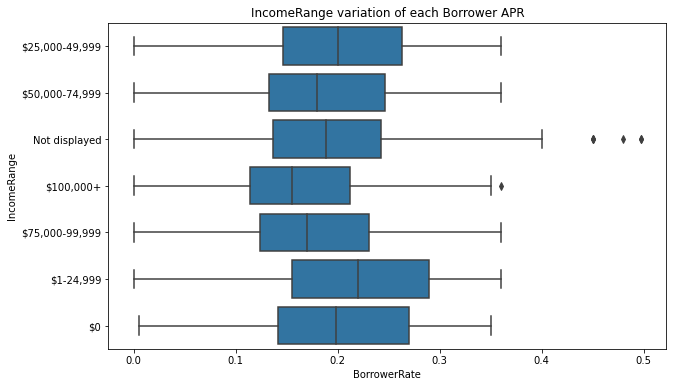

In [155]:
plt.figure(figsize = [10, 6])
sb.boxplot(data = df_loan, y = "IncomeRange", x = "BorrowerRate", color = base_color);
plt.title("IncomeRange variation of each Borrower APR");

Observation: on the above diagram we can see person of all income ranges largely lie beteen 0.15 and 0.3 %. Not Displayed range has plenty of outliers 

####  How income range affects the posper rating 

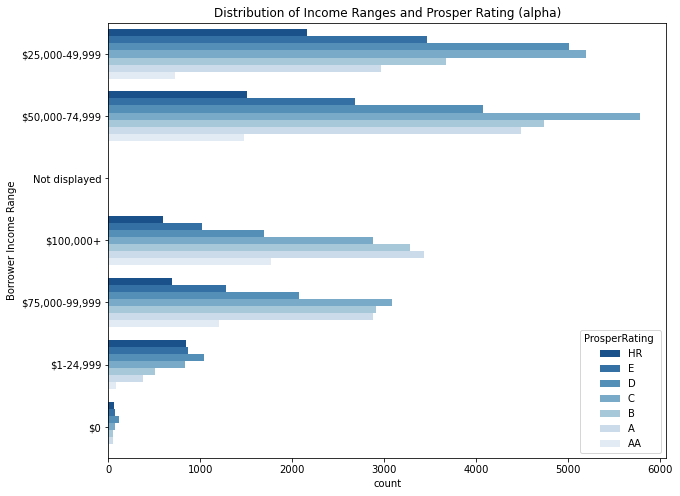

In [156]:
#Income range vs Prosper rating using  clustered bar chart of categorical data 

# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df_loan, y = 'IncomeRange', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues_r')

ax.legend(title = 'ProsperRating ')
plt.title('Distribution of Income Ranges and Prosper Rating (alpha)')
plt.ylabel('Income Range');

Observation : Not Displayed has no ProsperRating, From the plot we can observe that income range of 50k to 70k have the highestcount of prosper rating D. with this information it can encourange person s of rating D and income range of 50k to 70k to take up more loan since they have a higher chance of getting loans. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>As we get into low risk range (From HR to AA ) the APR reduce drastically. Also number of outliers also decreases down the line. From the plot we can observe that income range of 50k to 70k have the highestcount of prosper rating D. with this information it can encourange person s of rating D and income range of 50k to 70k to take up more loan since they have a higher chance of getting loans. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we can observe from the graph that the groups of higher risk (HR) took lower loan amount and the groups C, B and A looks like have the same median loan amounts. The lowest risk group AA shows highest median loan amount. The result is as expected as people with lower risk have the tendency to take more amount and vice versa
 

<a id='04'></a>
## Multivariate Exploration


In [157]:
#the correlation matrix of the variables 
cormat = df_loan.corr()
round(cormat,2)
cormat.style.background_gradient(cmap='coolwarm')

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
LoanOriginalAmount,1.000000,-0.313230,-0.319759,0.402822,0.337737
BorrowerAPR,-0.313230,1.000000,0.989511,-0.169975,-0.002388
BorrowerRate,-0.319759,0.989511,1.000000,-0.182848,0.028777
StatedMonthlyIncome,0.402822,-0.169975,-0.182848,1.000000,0.073722
Term,0.337737,-0.002388,0.028777,0.073722,1.000000


Observation : loan original amount and stated monthly income are posituve correlated so as term.
Loan orginal amout and borrower are negative correlated 

#### ProsperRating (Alpha) vs Borrower Rate and  Employment Status 
further looking on prosper rating 

/home/analyst/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


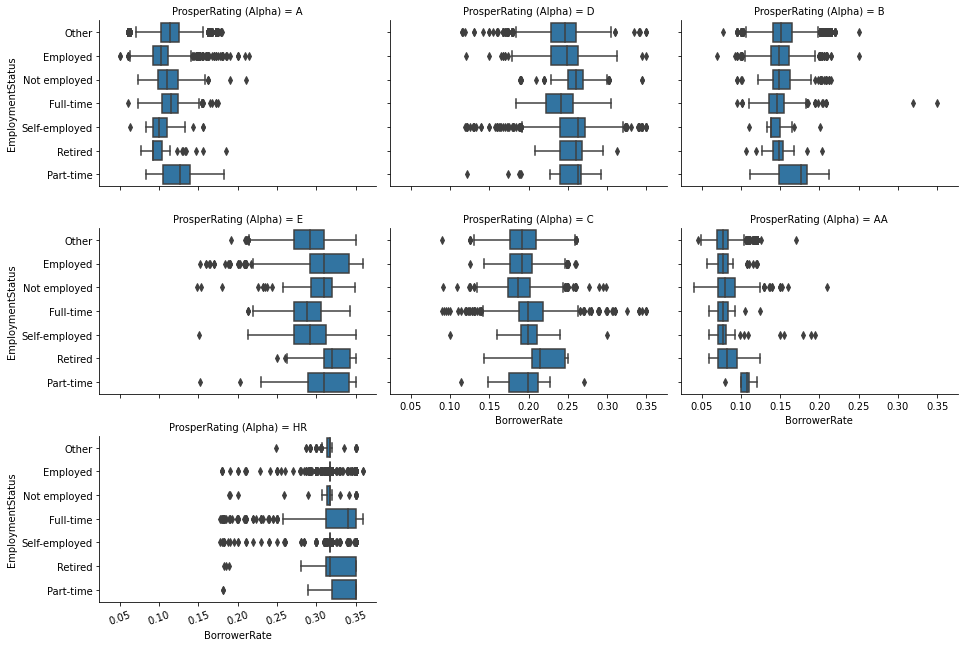

In [197]:
# plot matrix of numeric features against categorical features.

g = sb.FacetGrid(data = loan, col = "ProsperRating (Alpha)", col_wrap = 3, aspect = 1.5)
g.map(sb.boxplot, "BorrowerRate","EmploymentStatus")
plt.xticks(rotation = 20);

Observation:Employee stattus with prosper rating of HR hav a high Borrower Rate as compared to the rest while Employee status witj prosper rate of AA have the lowest Borrowers Rate. 

### The ProsperRating(alpha), StatedMonthlyIncome, and Term

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='StatedMonthlyIncome'>

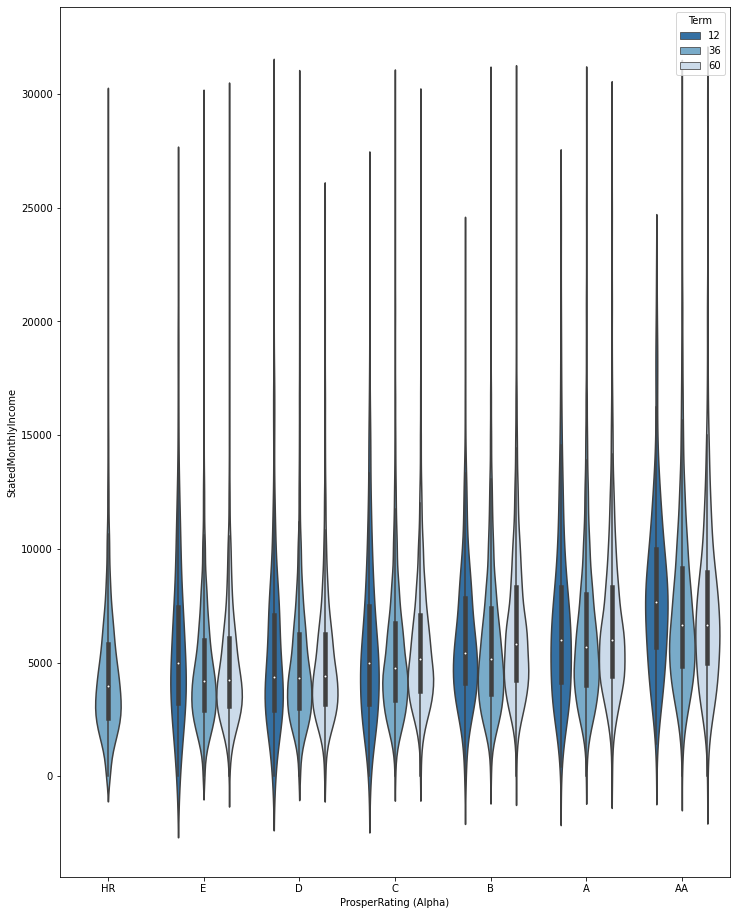

In [180]:
plt.figure(figsize = [12, 16])
sb.violinplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues_r')

Observation : For stated monthly income, it doesn't seem like there is a no effect between term and prosper rating

### ProsperRating vs Borrower rate and term

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='BorrowerRate'>

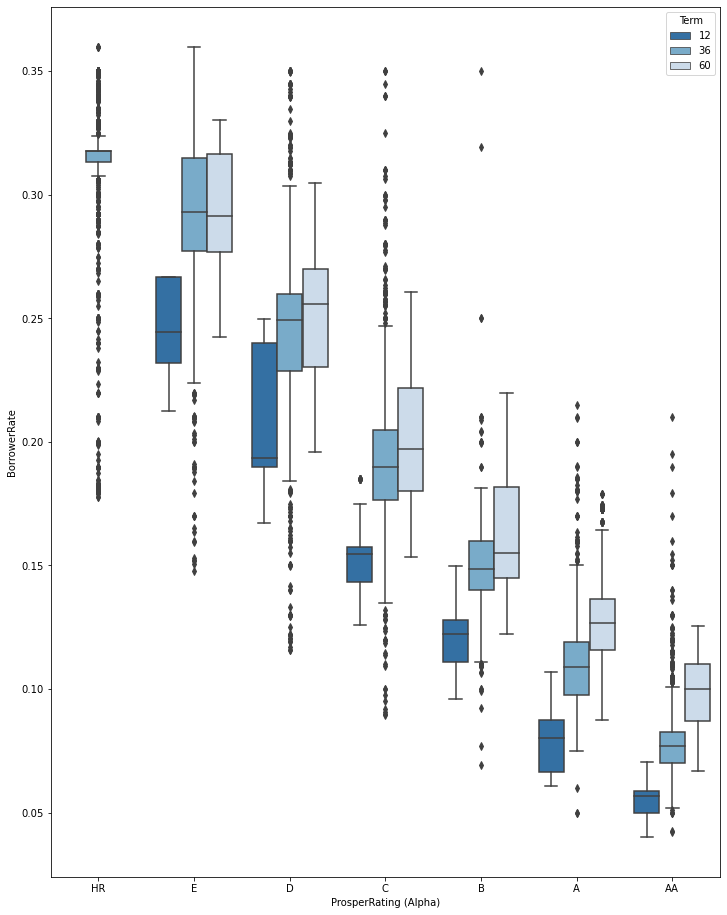

In [165]:
plt.figure(figsize = [12, 16])

# subplot 1: Prosper rating vs term

sb.boxplot(data = df_loan, x = 'ProsperRating (Alpha)', y = "BorrowerRate", hue = 'Term', palette = 'Blues_r')



> Observation : there are different term levels 12, 36, 60 months. In prosper rating of AA the borrowers rale is low and majority choose term rate of 36  months. there is zero persons  in HR Rating that choose 6 or 36 months 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Employee status with prosper rating of HR hav a high Borrower Rate as compared to the rest while Employee status witj prosper rate of AA have the lowest Borrowers Rate.
>In prosper rating of AA the borrowers rale is low and majority choose term rate of 36  months 

### Were there any interesting or surprising interactions between features?

> There were no such interesting interactions found between the variables in the analysis carried out here

<a id='05'></a>
## Conclusions
>At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount. Clents with low income ranges are more likely not to be given loans 
The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers


